ÁRBOL DE DECISIÓN

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from pickle import dump
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif


In [18]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"
df = pd.read_csv(url)

In [19]:
print(df.head())
print(df.describe().T)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.0000

In [20]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


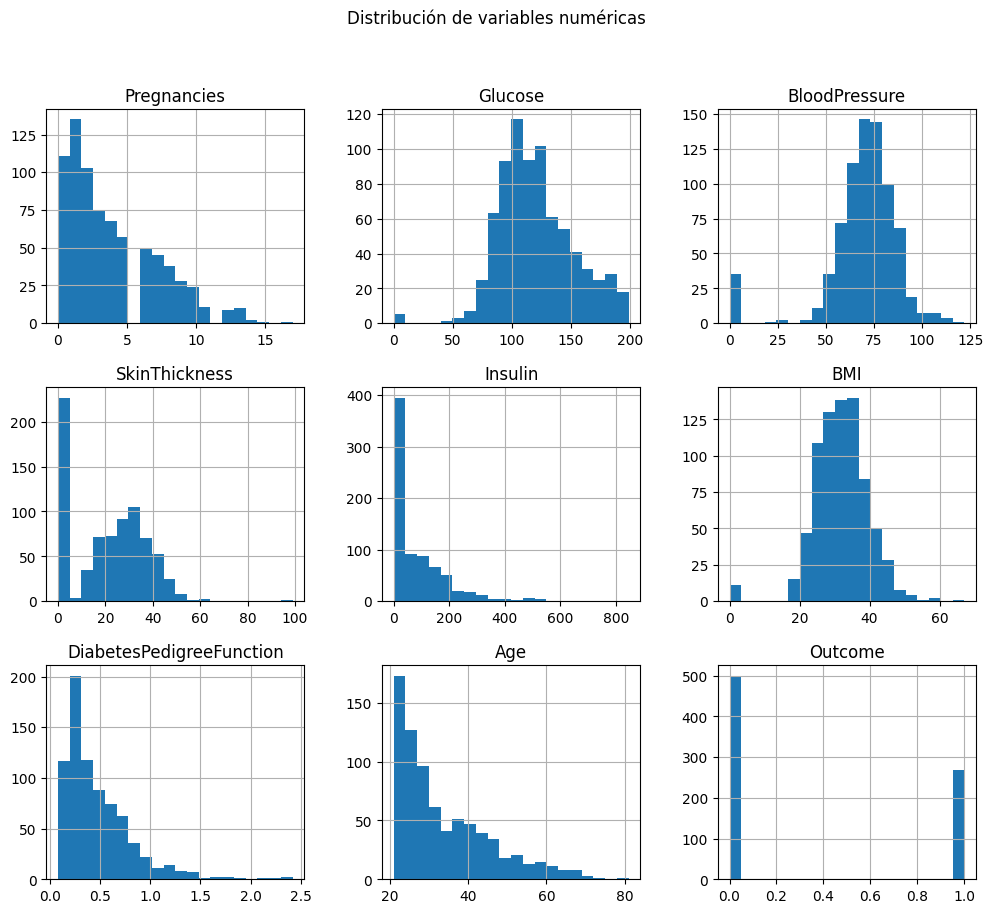

In [21]:
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Distribución de variables numéricas")
plt.show()

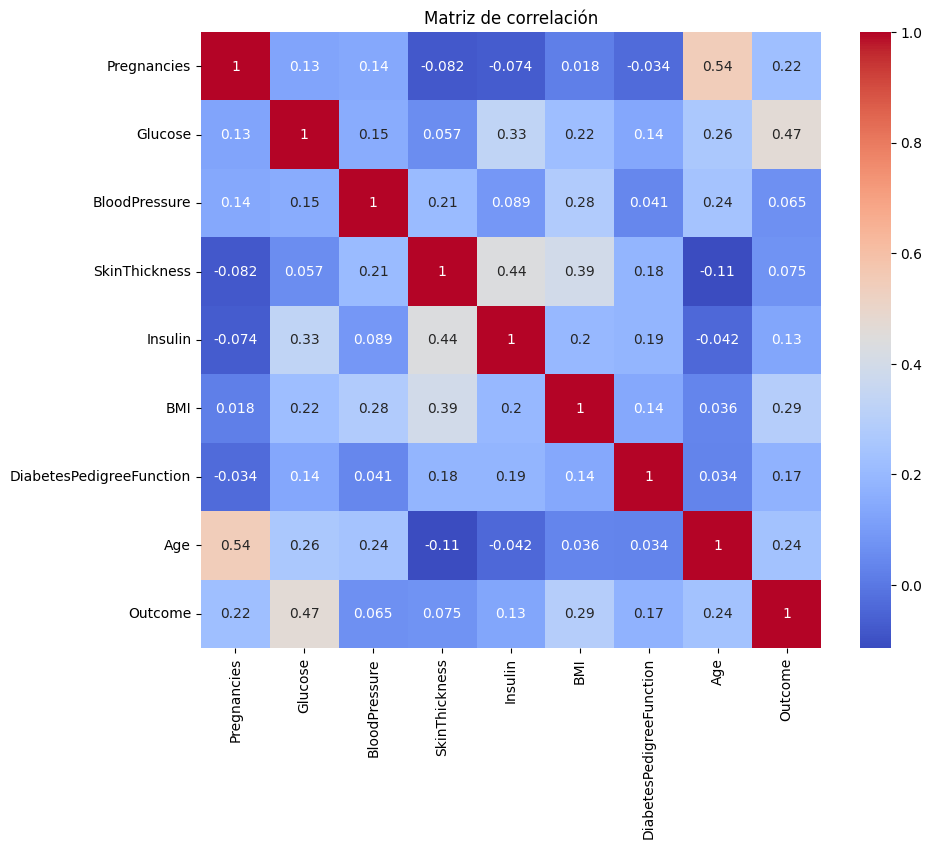

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [23]:
df_clean = df.copy()
num_cols = df_clean.drop("Outcome", axis=1).columns

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print(f"Filas originales: {df.shape[0]}")
print(f"Filas después de eliminar outliers: {df_clean.shape[0]}")
df = df_clean

Filas originales: 768
Filas después de eliminar outliers: 636


In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

mask = selector.get_support()
selected_features = X.columns[mask]

print("Variables seleccionadas:")
print(selected_features)

df = df[selected_features.tolist() + ["Outcome"]]

Variables seleccionadas:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')


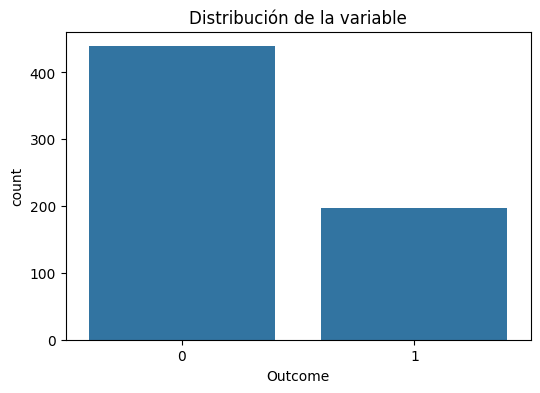

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x="Outcome", data=df)
plt.title("Distribución de la variable")
plt.show()

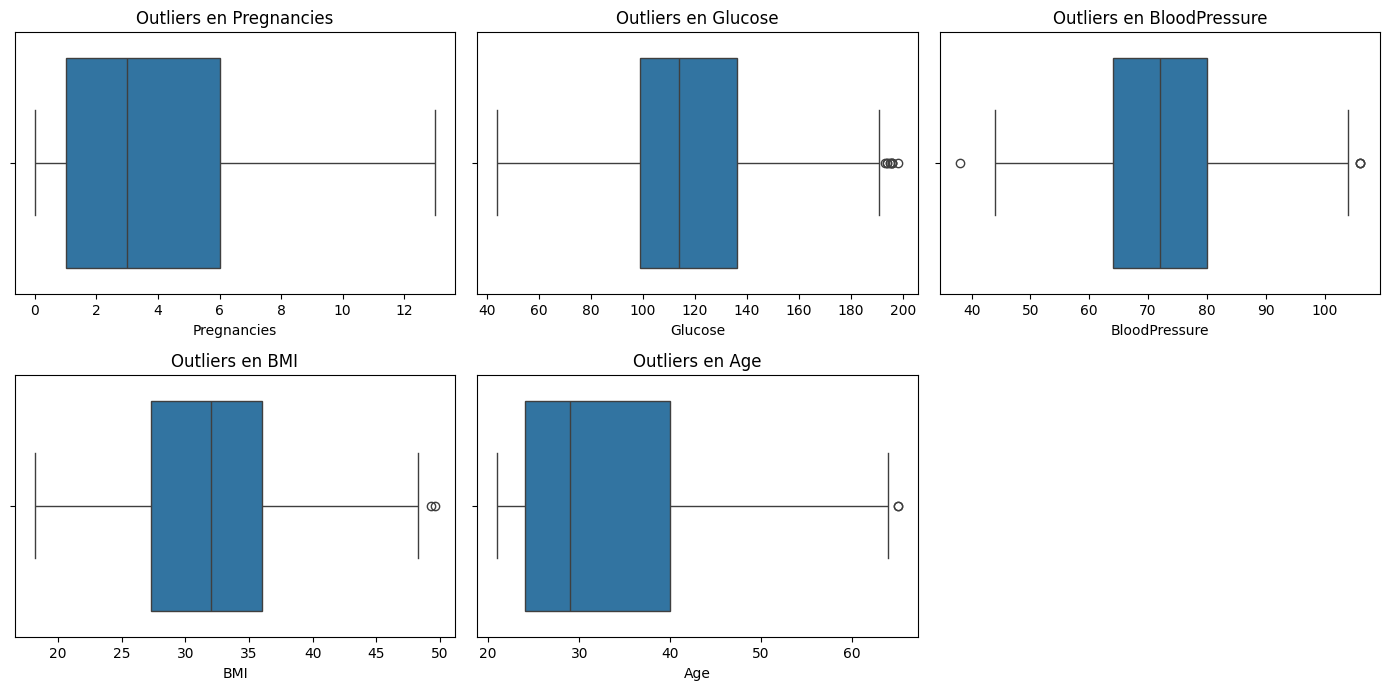

In [26]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Outliers en {col}")
plt.tight_layout()
plt.show()

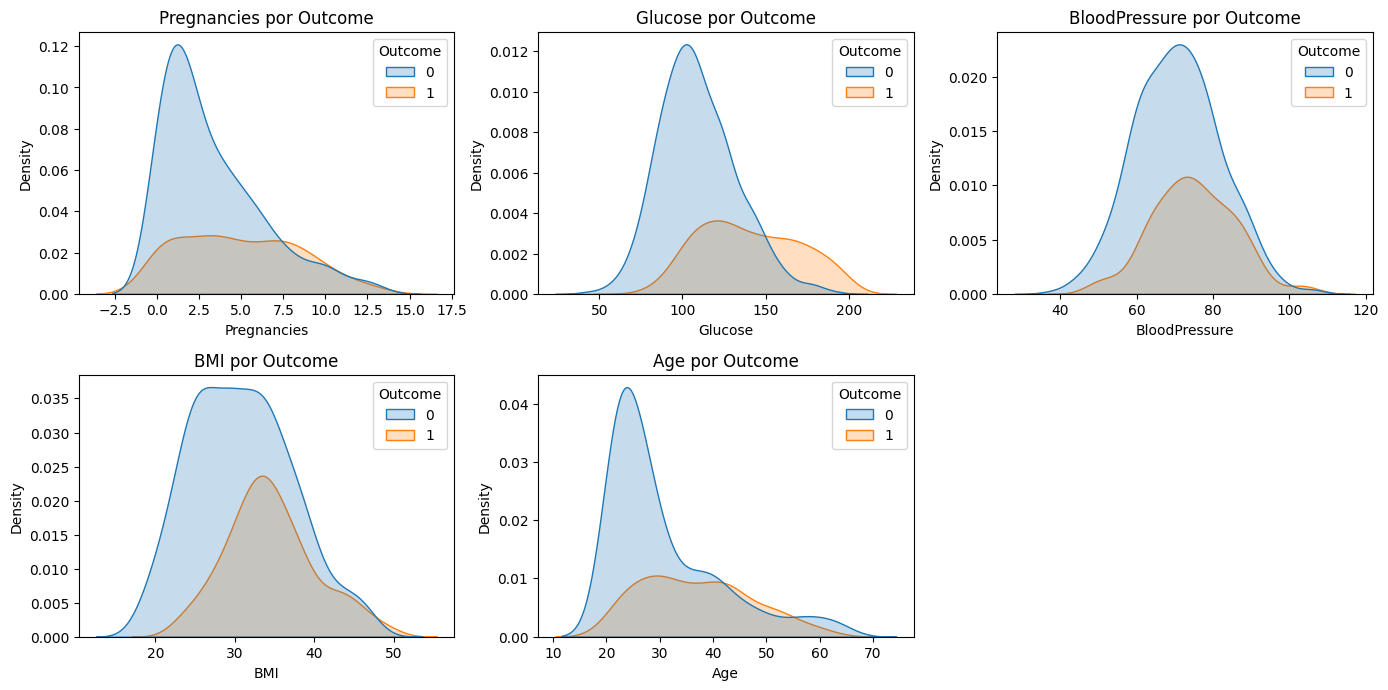

In [27]:
plt.figure(figsize=(14,10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=df, x=col, hue="Outcome", fill=True)
    plt.title(f"{col} por Outcome")
plt.tight_layout()
plt.show()

In [28]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTamaño Train:", X_train.shape)
print("Tamaño Test:", X_test.shape)


Tamaño Train: (508, 5)
Tamaño Test: (128, 5)


DIVIDIR DATOS EN TRAIN/TEST

In [29]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño Train:", X_train.shape)
print("Tamaño Test:", X_test.shape)

Tamaño Train: (508, 5)
Tamaño Test: (128, 5)


MODELO DECISION

Accuracy (default tree): 0.6953125


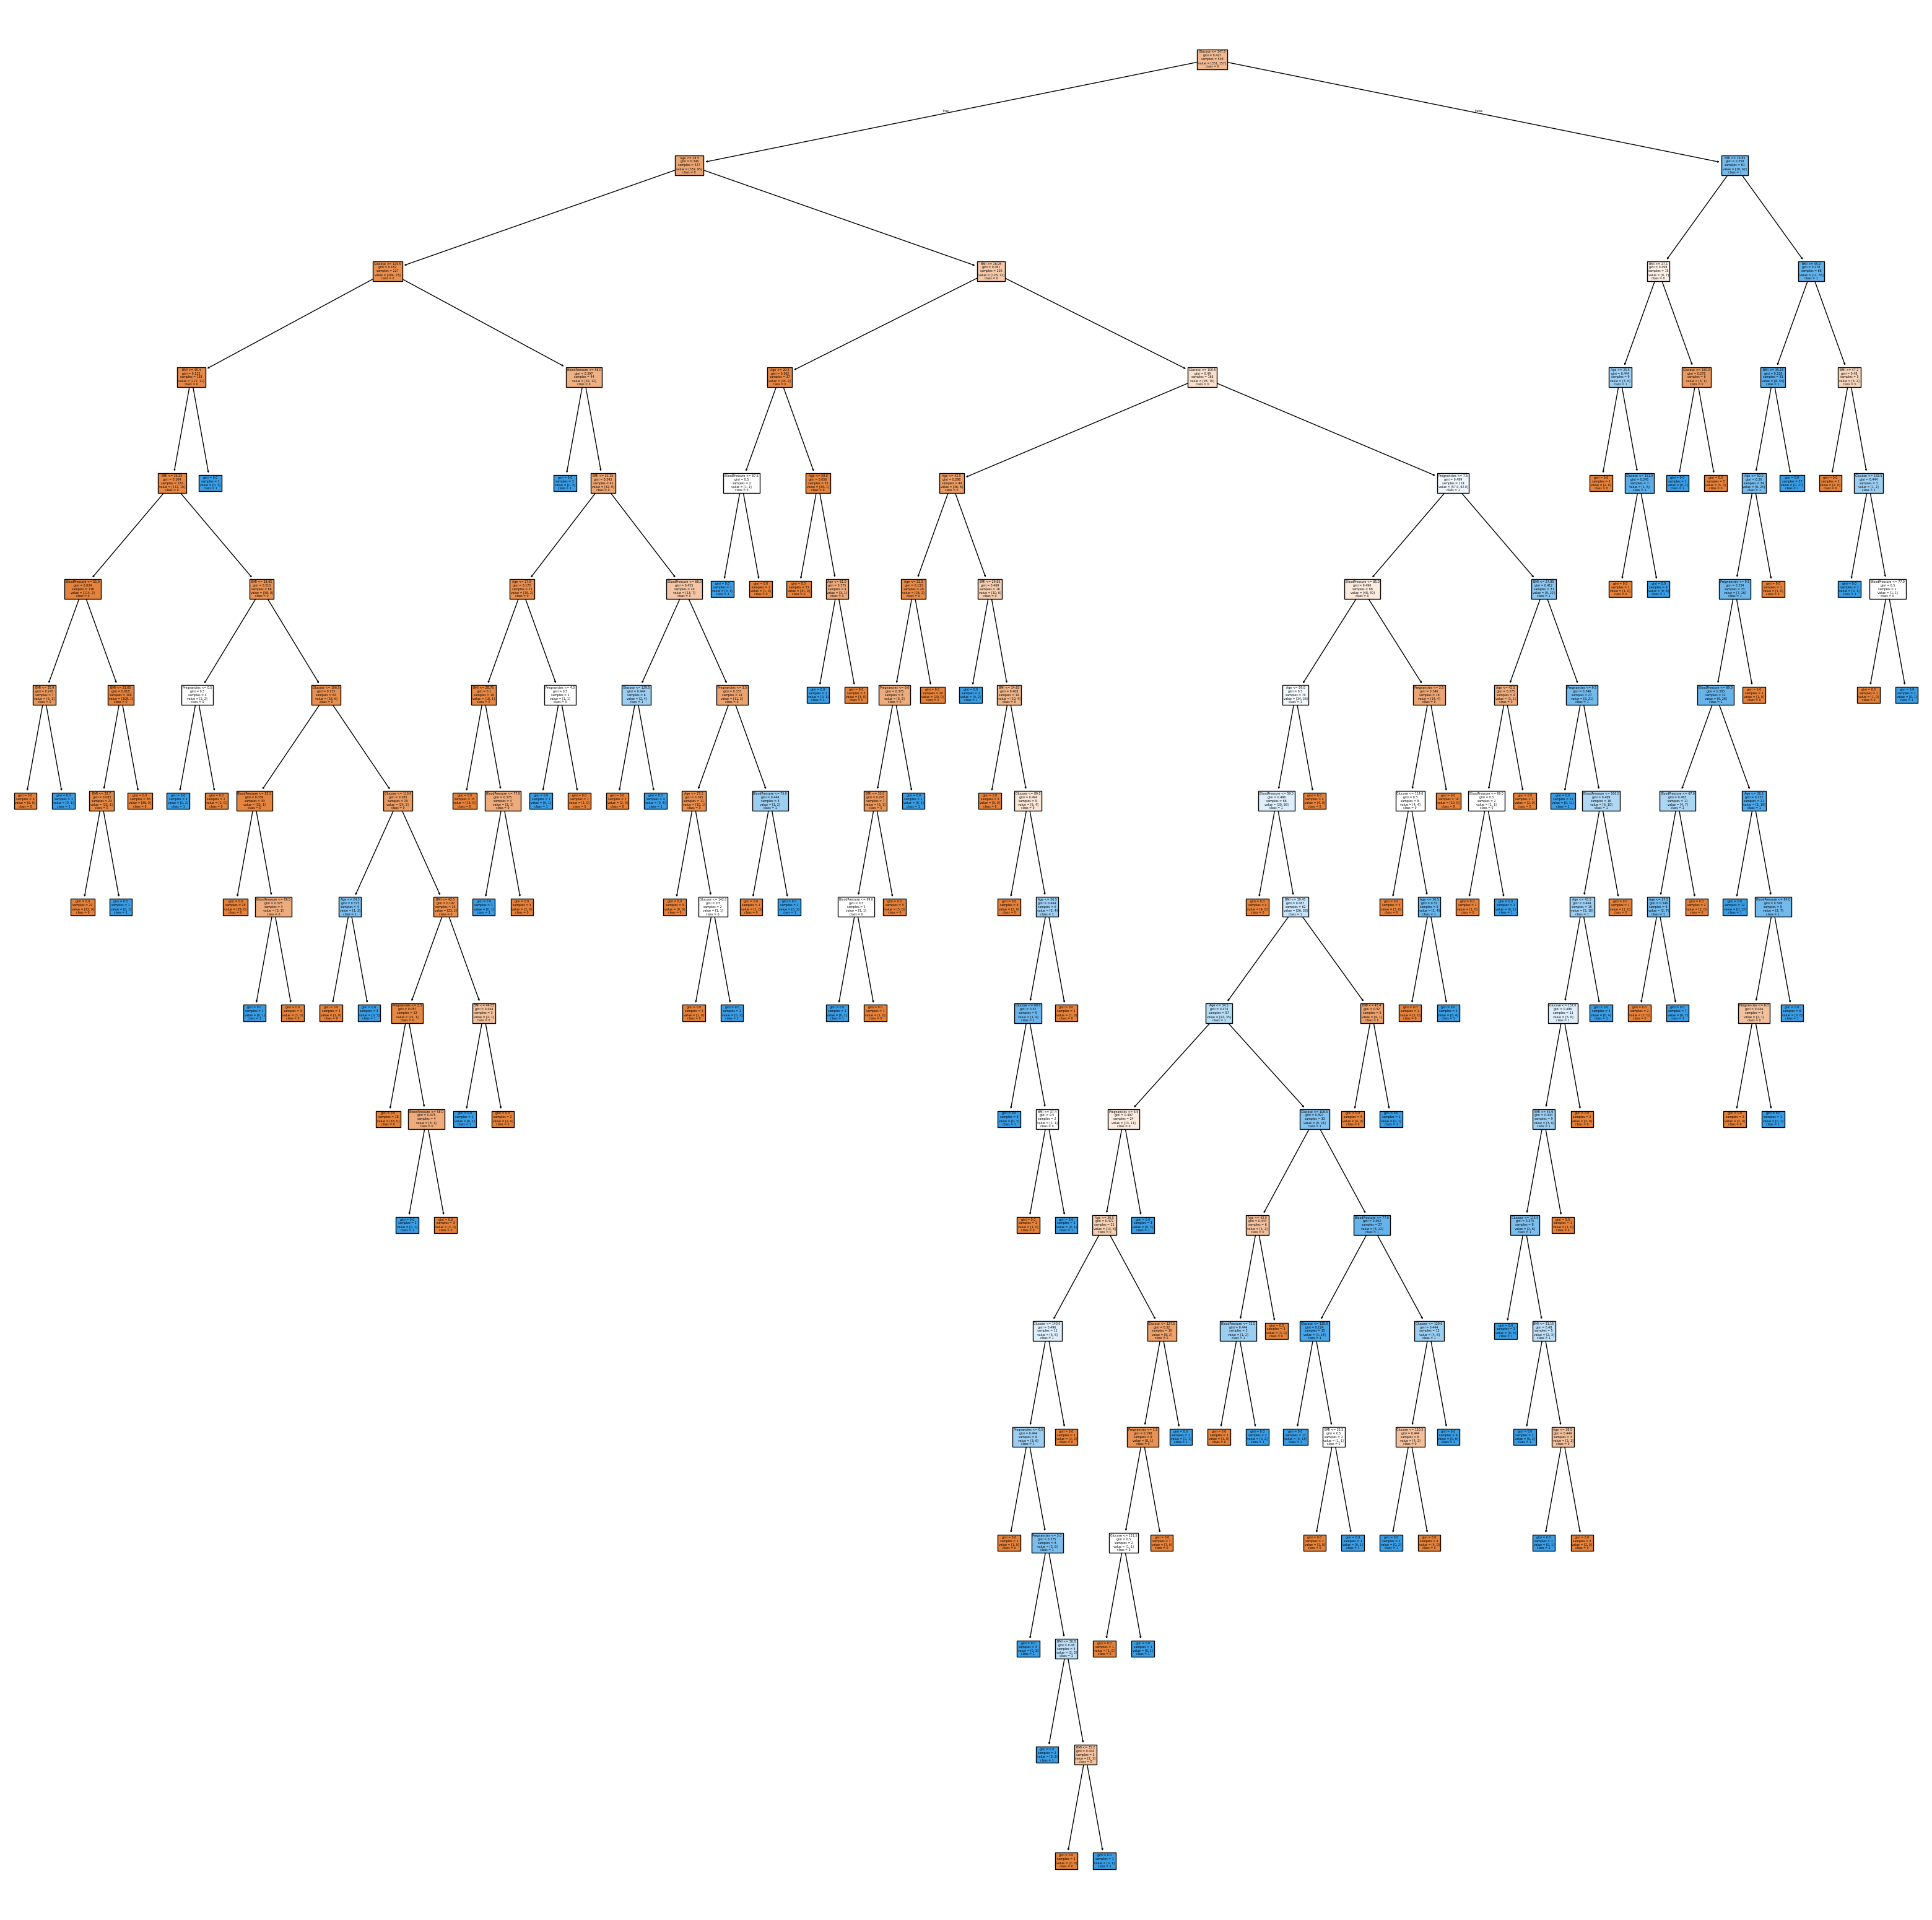

In [30]:
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)

y_pred_default = clf_default.predict(X_test)
print("Accuracy (default tree):", accuracy_score(y_test, y_pred_default))

plt.figure(figsize=(40,40))
plot_tree(clf_default, feature_names=X_train.columns, class_names=["0","1"], filled=True)
plt.show()

ANALIZAR CRITERION

Accuracy con criterion=gini: 0.6953125


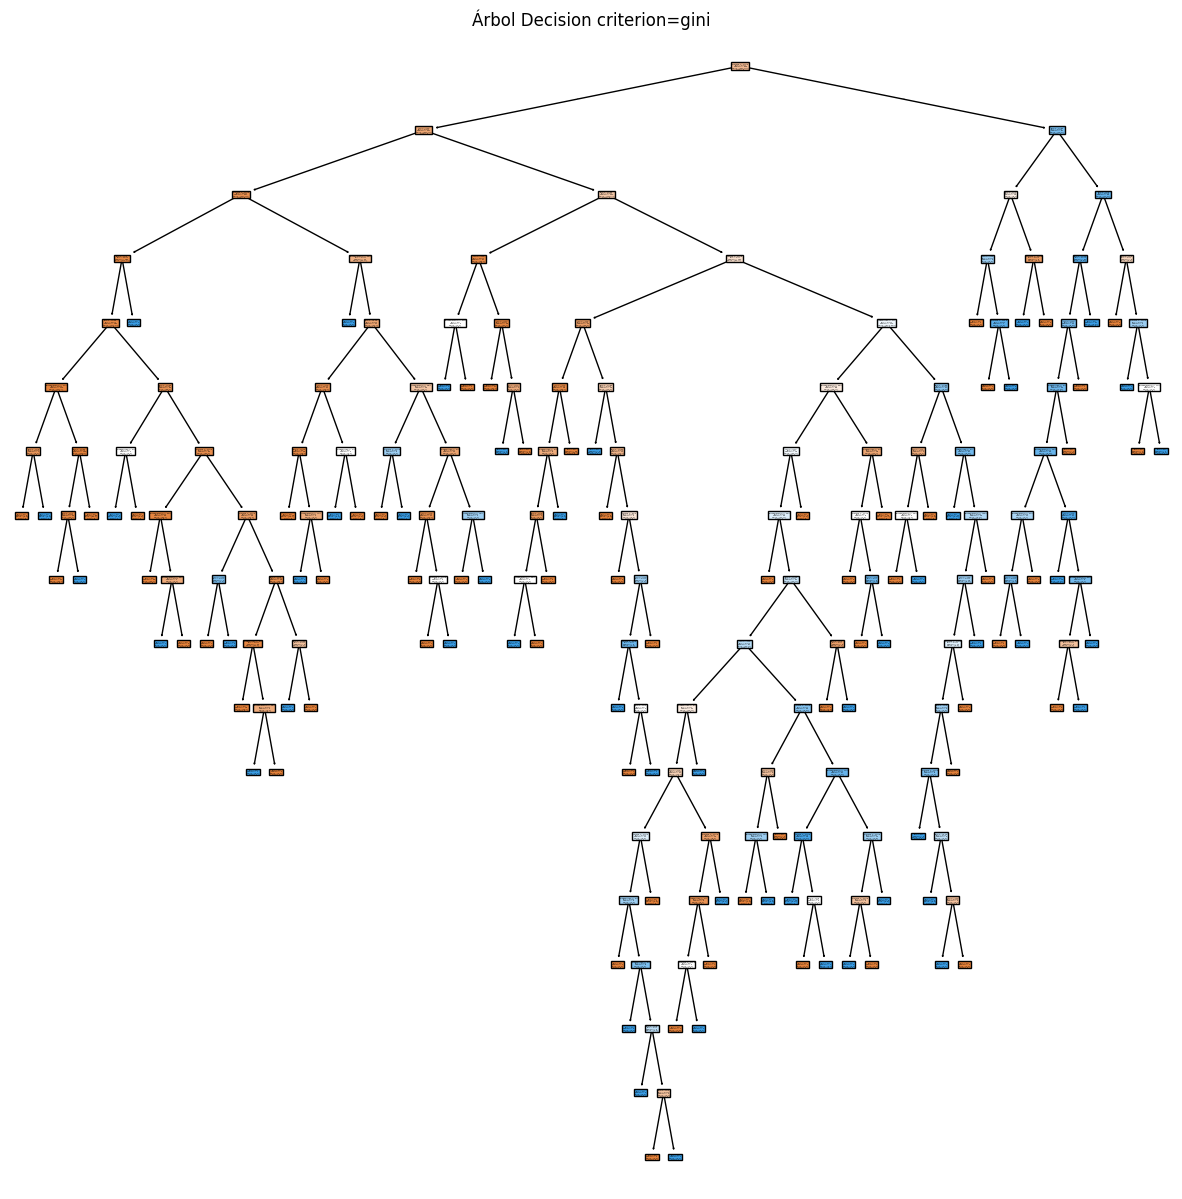

Accuracy con criterion=entropy: 0.7578125


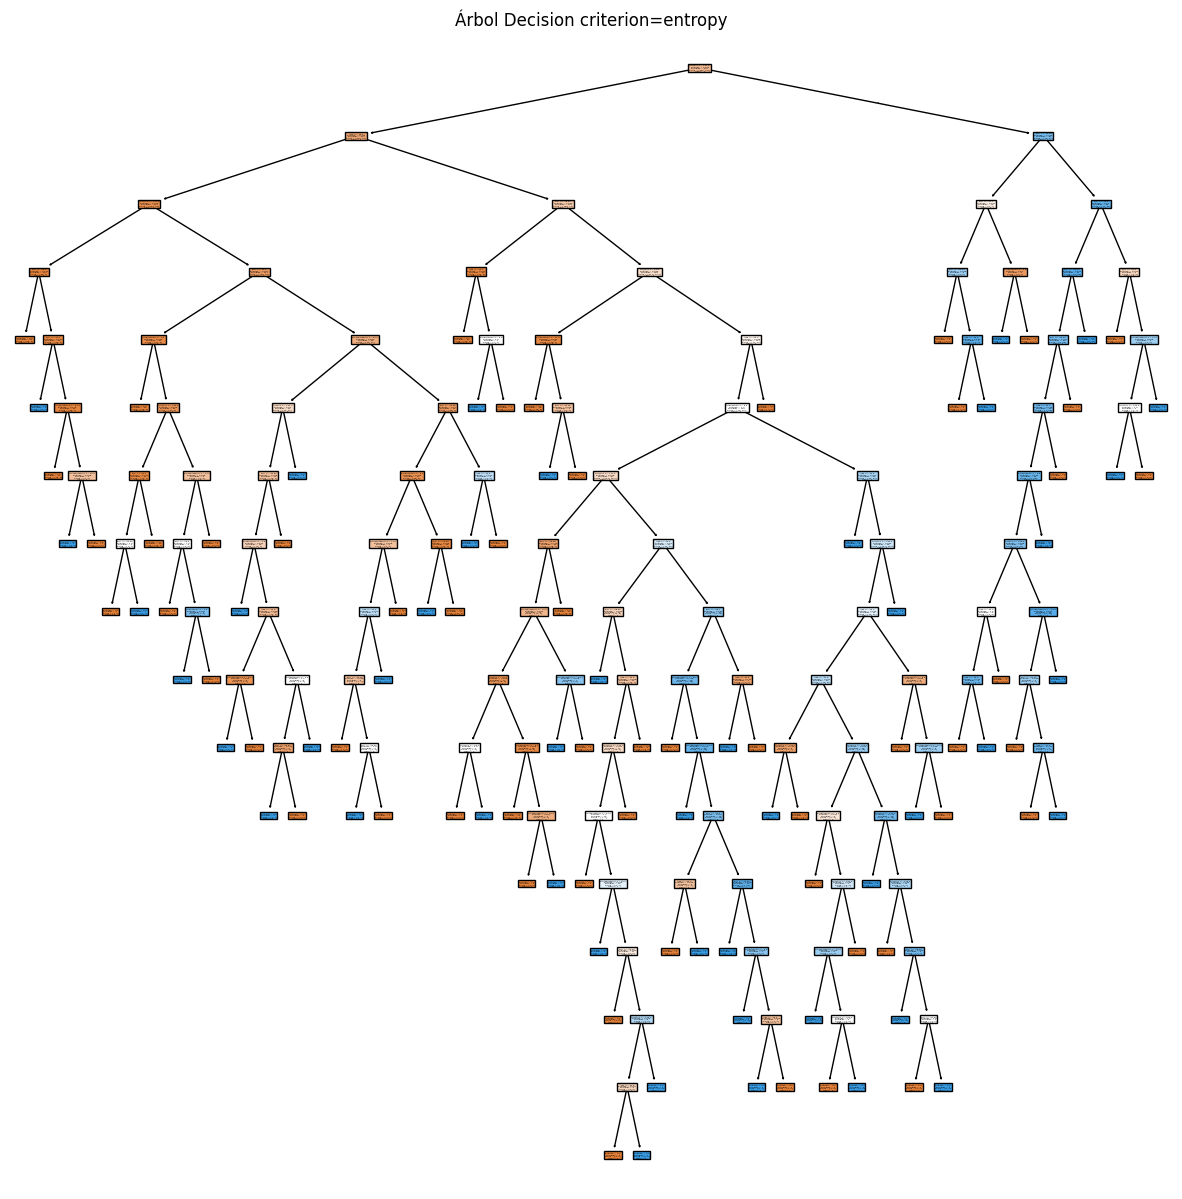

In [31]:
criterions = ["gini", "entropy"]
for c in criterions:
    clf = DecisionTreeClassifier(criterion=c, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Accuracy con criterion={c}: {accuracy_score(y_test, y_pred)}")
    plt.figure(figsize=(15,15))
    plot_tree(clf, feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.title(f"Árbol Decision criterion={c}")
    plt.show()

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy final en test set: 0.765625


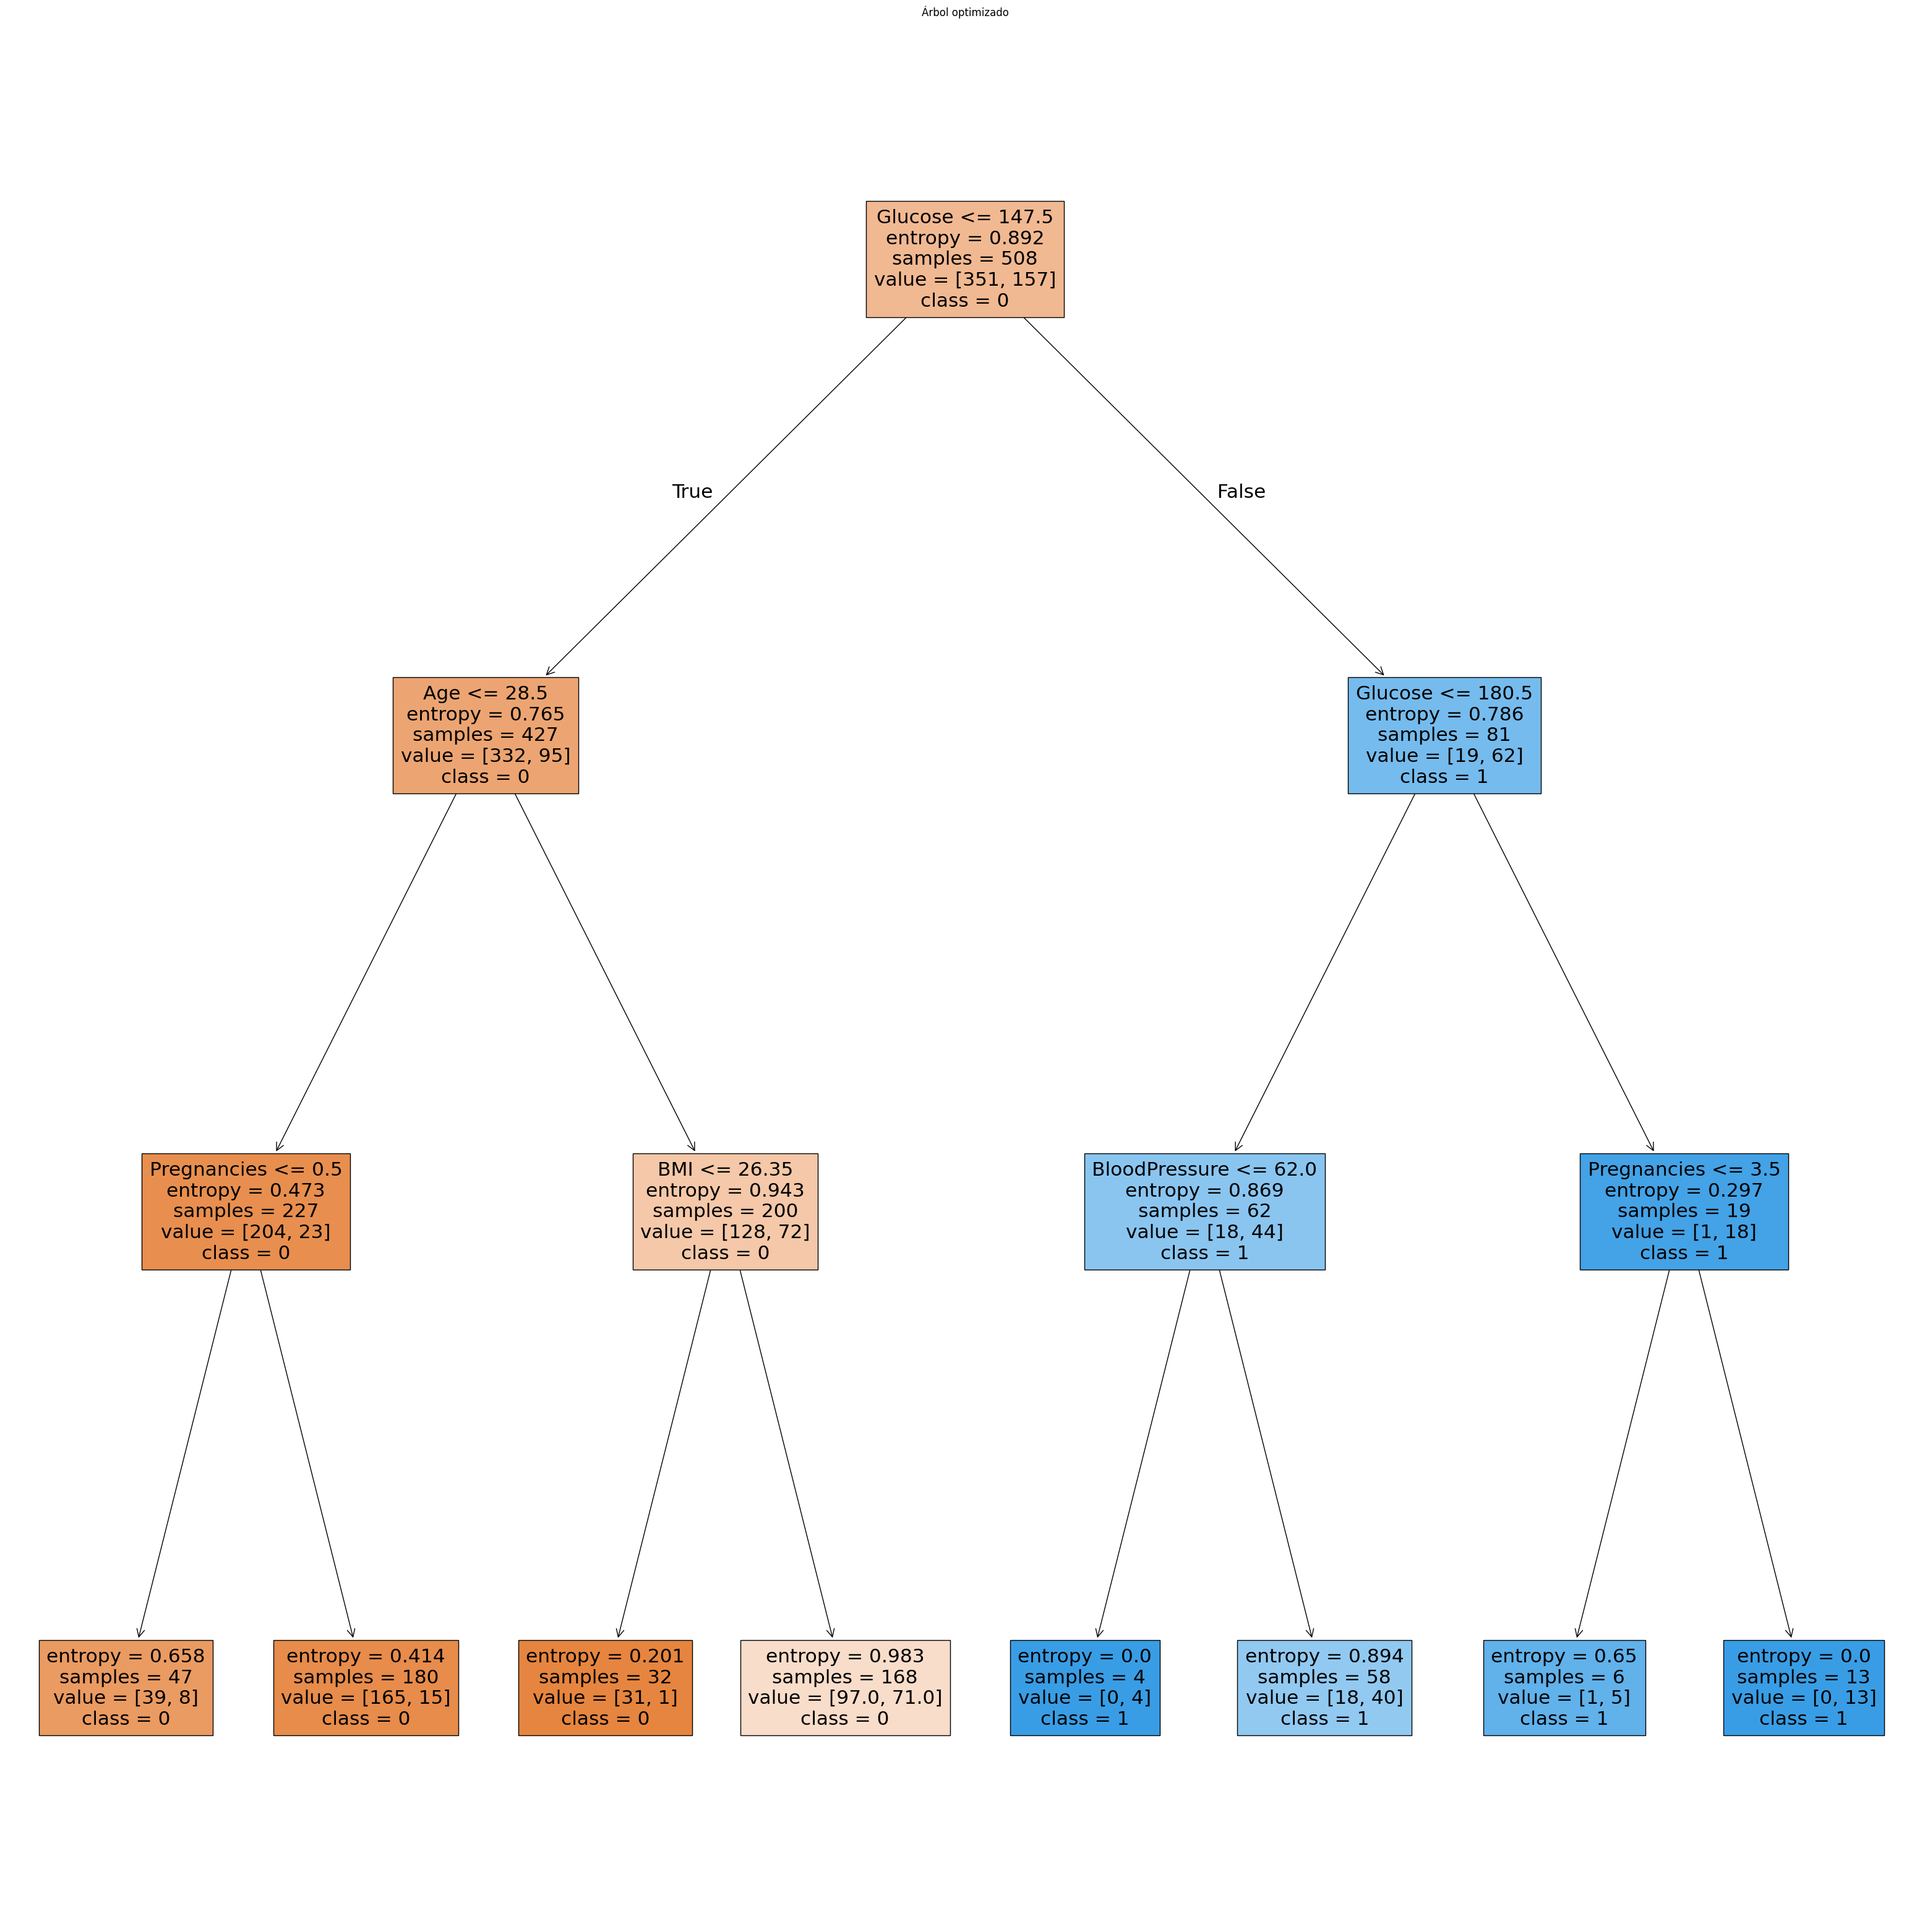

In [32]:
param_grid = {
    "max_depth": [3,5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4],
    "max_features": [None, "sqrt", "log2"],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
print("Accuracy final en test set:", accuracy_score(y_test, y_pred_best))

# Visualizar árbol optimizado
plt.figure(figsize=(40,40))
plot_tree(best_model, feature_names=X_train.columns, class_names=["0","1"], filled=True)
plt.title("Árbol optimizado")
plt.show()

In [33]:
csv_path = "/workspaces/arboldedecision_Santi_Izquierdo/src/decision_tree_diabetes_optimized.csv"
df.to_csv(csv_path, index=False)
print(f"Dataset guardado correctamente en: {csv_path}")

model_path = "/workspaces/arboldedecision_Santi_Izquierdo/src/decision_tree_diabetes_optimized.sav"
dump(best_model, open(model_path, "wb"))
print(f"Modelo guardado correctamente en: {model_path}")

Dataset guardado correctamente en: /workspaces/arboldedecision_Santi_Izquierdo/src/decision_tree_diabetes_optimized.csv
Modelo guardado correctamente en: /workspaces/arboldedecision_Santi_Izquierdo/src/decision_tree_diabetes_optimized.sav
